# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# code to save the figures as high-res PNGs
import os
from pathlib import Path
from matplotlib import pyplot as plt

IMAGES_PATH = Path() / "Hybrid-Images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Load Dataset

In [3]:
# Load the dataset
df = pd.read_csv('hybrid_power.csv')

In [4]:
# See the first 5 rows
df.head()

,Date and Hour,Date,StartHour,EndHour,Source,Production,dayOfYear,dayName,monthName
0,2020-07-22 20:00:00+02:00,2020-07-22,20:00:00,21:00:00,Solar,244.0,204,Wednesday,July
1,2020-07-23 07:00:00+02:00,2020-07-23,07:00:00,08:00:00,Solar,223.0,205,Thursday,July
2,2020-07-23 16:00:00+02:00,2020-07-23,16:00:00,17:00:00,Solar,2517.0,205,Thursday,July
3,2020-07-23 19:00:00+02:00,2020-07-23,19:00:00,20:00:00,Solar,658.0,205,Thursday,July
4,2020-07-23 23:00:00+02:00,2020-07-23,23:00:00,24:00:00,Solar,0.0,205,Thursday,July


In [5]:
# Details info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59806 entries, 0 to 59805
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date and Hour  59806 non-null  object 
 1   Date           59806 non-null  object 
 2   StartHour      59806 non-null  object 
 3   EndHour        59806 non-null  object 
 4   Source         59806 non-null  object 
 5   Production     59804 non-null  float64
 6   dayOfYear      59806 non-null  int64  
 7   dayName        59806 non-null  object 
 8   monthName      59806 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 4.1+ MB


In [6]:
# Count missing values in each column
missing_values = df.isnull().sum()
missing_values

Date and Hour    0
Date             0
StartHour        0
EndHour          0
Source           0
Production       2
dayOfYear        0
dayName          0
monthName        0
dtype: int64

In [7]:
# Handle missing values in the Production column by filling with the mean of the column
df['Production'].fillna(df['Production'].mean(), inplace=True)

In [8]:
# Count missing values in each column
missing_values = df.isnull().sum()
missing_values

Date and Hour    0
Date             0
StartHour        0
EndHour          0
Source           0
Production       0
dayOfYear        0
dayName          0
monthName        0
dtype: int64

# Distribution of Produced Energy

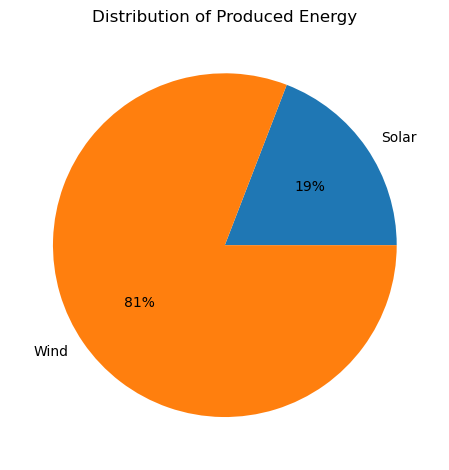

In [9]:
total_production_by_source = df.groupby('Source')['Production'].sum().reset_index()
data = total_production_by_source['Production']
labels = total_production_by_source['Source']
plt.pie(data, labels=labels, autopct='%.0f%%')
plt.title('Distribution of Produced Energy')
save_fig('Distribution of Produced Energy')
plt.show()

# Visualize: How does the production vary across different hours of the day?

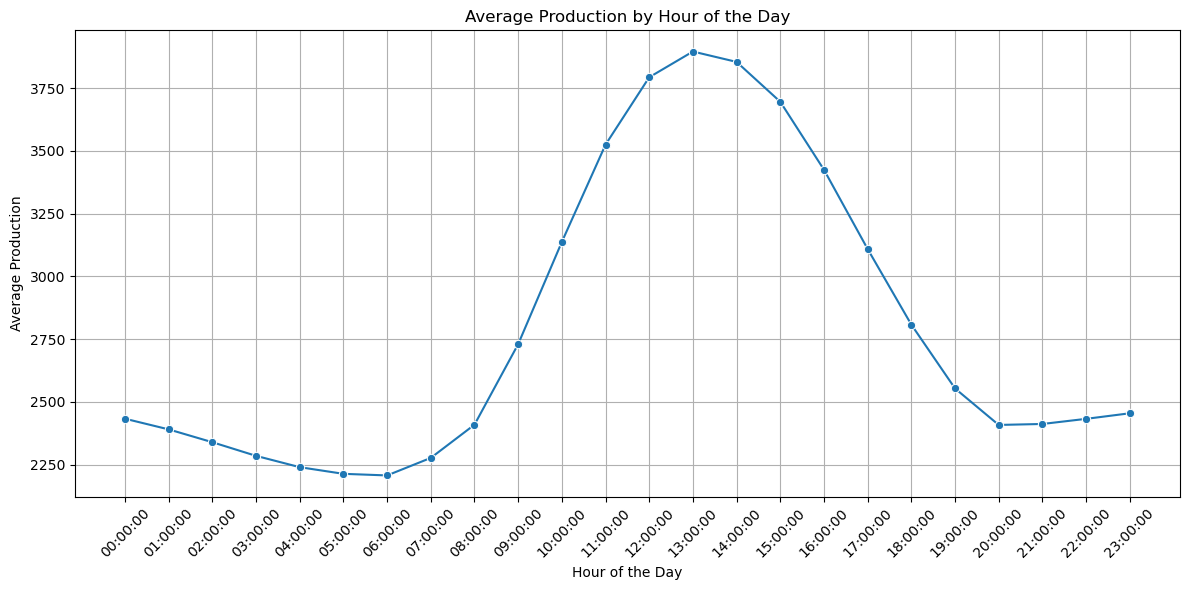

In [10]:
df['Hour'] = df['StartHour']
production_by_hour = df.groupby('Hour')['Production'].mean()

# Plot production by hour
plt.figure(figsize=(12, 6))
sns.lineplot(x=production_by_hour.index, y=production_by_hour.values, marker='o')
plt.title('Average Production by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Production')
plt.xticks(rotation=45)
plt.grid(True)
save_fig('Average Production by Hour of the Day')
plt.show()

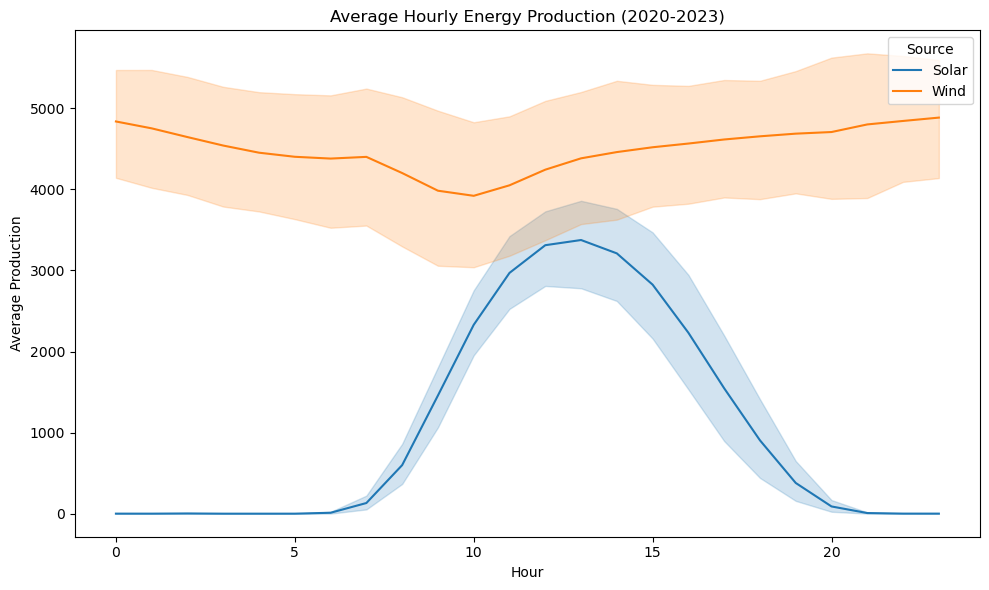

In [11]:
df['Hour'] = pd.to_datetime(df['StartHour'], format='%H:%M:%S').dt.hour
hourly_avg_production = df.groupby(['Hour', 'monthName', 'Source'])['Production'].mean().reset_index()

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=hourly_avg_production, x='Hour', y='Production', hue='Source')
plt.xlabel('Hour')
plt.ylabel('Average Production')
plt.title('Average Hourly Energy Production (2020-2023)')
save_fig('Average Hourly Energy Production (2020-2023)')
plt.show()

# Visualize: Production by Months

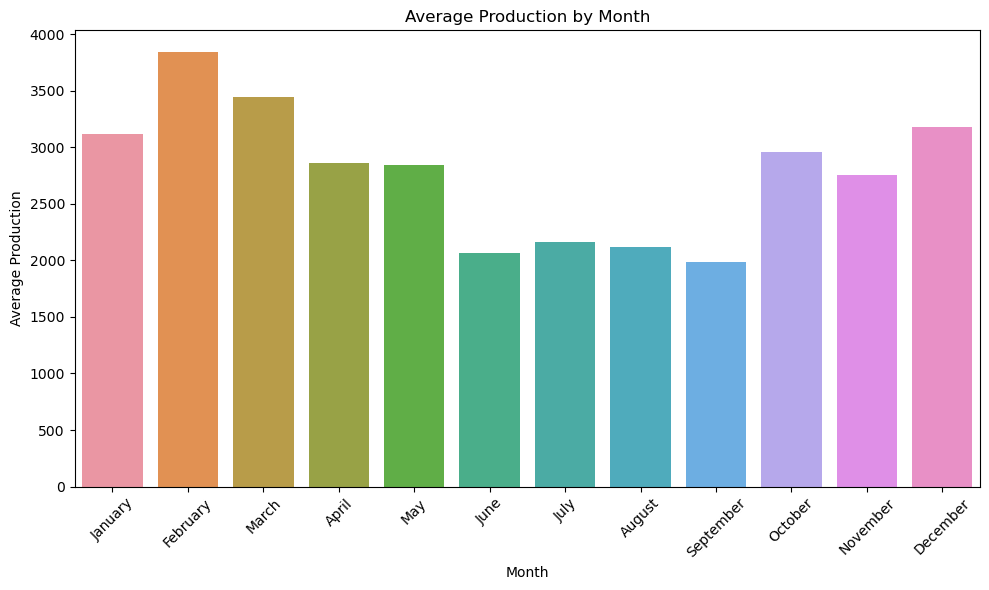

In [12]:
production_by_month = df.groupby('monthName')['Production'].mean().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

# Plot production by month
plt.figure(figsize=(10, 6))
sns.barplot(x=production_by_month.index, y=production_by_month.values)
plt.title('Average Production by Month')
plt.xlabel('Month')
plt.ylabel('Average Production')
plt.xticks(rotation=45)
save_fig('Average Production by Month')
plt.show()

# Visualize: Production by day of the week

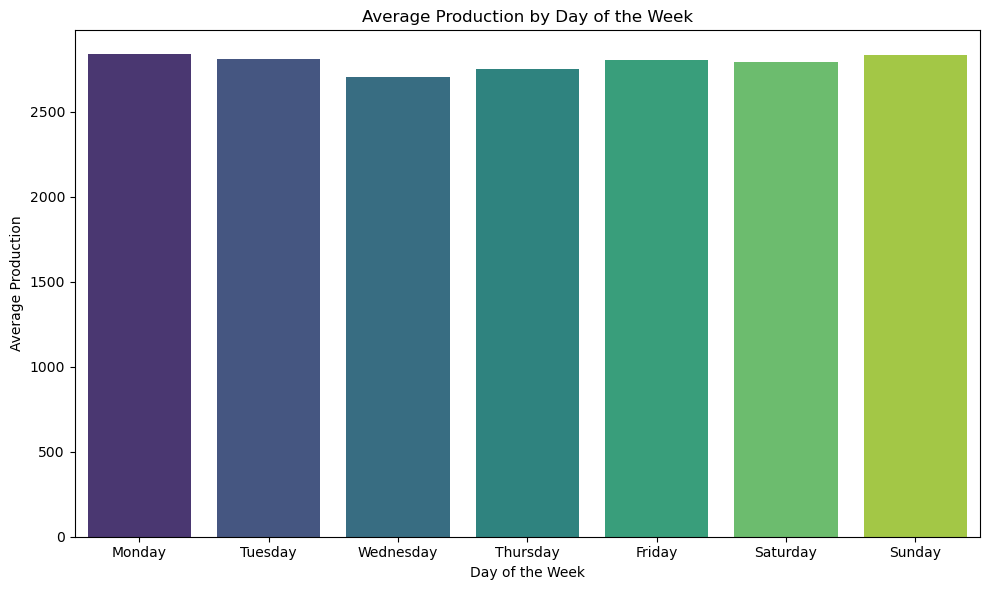

In [13]:
production_by_day = df.groupby('dayName')['Production'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot production by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=production_by_day.index, y=production_by_day.values, palette='viridis')
plt.title('Average Production by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Production')
save_fig('Average Production by Day of the Week')
plt.show()

# Visualize: Production by source

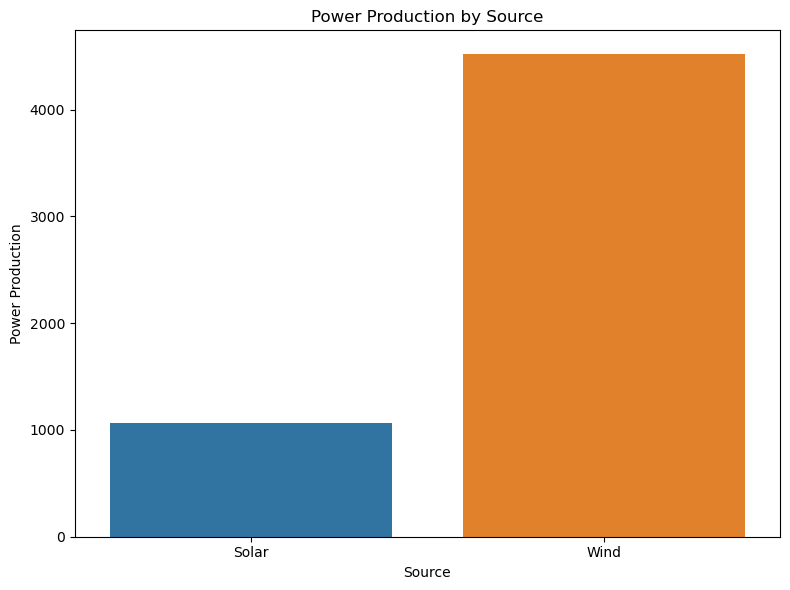

In [14]:
production_by_source = df.groupby('Source')['Production'].mean()

# Plot production by source
plt.figure(figsize=(8, 6))
sns.barplot(x=production_by_source.index, y=production_by_source.values)
plt.title('Power Production by Source')
plt.xlabel('Source')
plt.ylabel('Power Production')
save_fig('Power Production by Source')
plt.show()

# Are there any noticeable trends in production during weekdays vs. weekends?

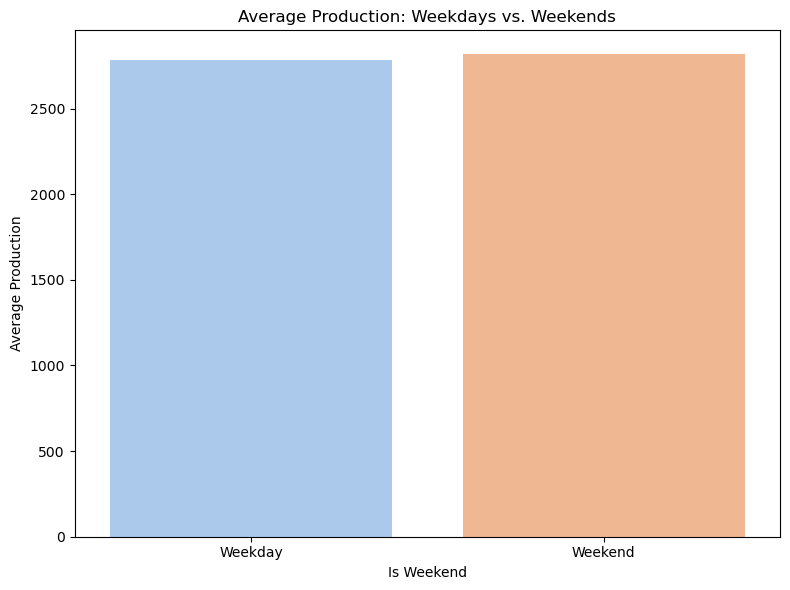

In [15]:
df['isWeekend'] = df['dayName'].isin(['Saturday', 'Sunday'])
production_by_weekend = df.groupby('isWeekend')['Production'].mean()

# Plot weekdays vs. weekends
plt.figure(figsize=(8, 6))
sns.barplot(x=production_by_weekend.index, y=production_by_weekend.values, palette='pastel')
plt.title('Average Production: Weekdays vs. Weekends')
plt.xlabel('Is Weekend')
plt.ylabel('Average Production')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
save_fig('Average Production Weekdays vs Weekends')
plt.show()

# Descriptive statistics

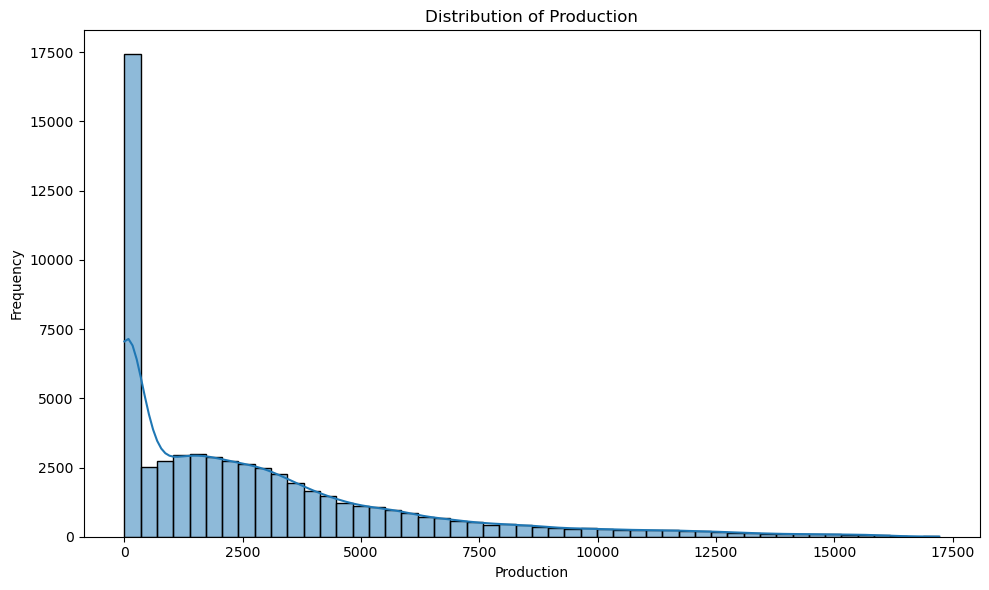

count    59806.000000
mean      2792.859775
std       3190.185971
min          0.000000
25%         42.250000
50%       1871.000000
75%       4053.000000
max      17220.000000
Name: Production, dtype: float64

In [16]:
production_stats = df['Production'].describe()

# Plot the distribution of production values
plt.figure(figsize=(10, 6))
sns.histplot(df['Production'], bins=50, kde=True)
plt.title('Distribution of Production')
plt.xlabel('Production')
plt.ylabel('Frequency')
save_fig('Distribution of Production')
plt.show()

production_stats

# Seasonal Analysis of production

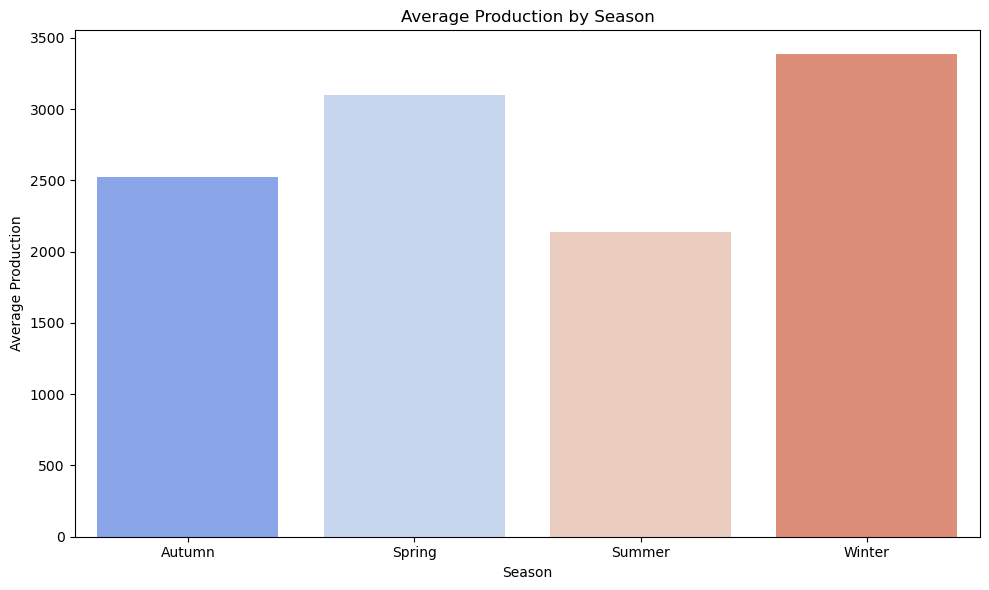

In [17]:
df['Season'] = df['monthName'].apply(lambda x: 'Winter' if x in ['December','January','February'] else
                                 ('Spring' if x in ['March', ' April', 'May'] else
                                  ('Summer' if x in [' June','July', 'August'] else 'Autumn')))
production_by_season = df.groupby('Season')['Production'].mean()

# Plot production by season
plt.figure(figsize=(10, 6))
sns.barplot(x=production_by_season.index, y=production_by_season.values, palette='coolwarm')
plt.title('Average Production by Season')
plt.xlabel('Season')
plt.ylabel('Average Production')
save_fig('Average Production by Season')
plt.show()

In [18]:
# Convert 'Date and Hour' column to datetime
# df['Date and Hour'] = pd.to_datetime(df['Date and Hour'])
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
# df['Month'] = df['Date'].dt.month_name()

# Set the aesthetics for the plots
#sns.set(style="whitegrid")

# Annual Energy Production

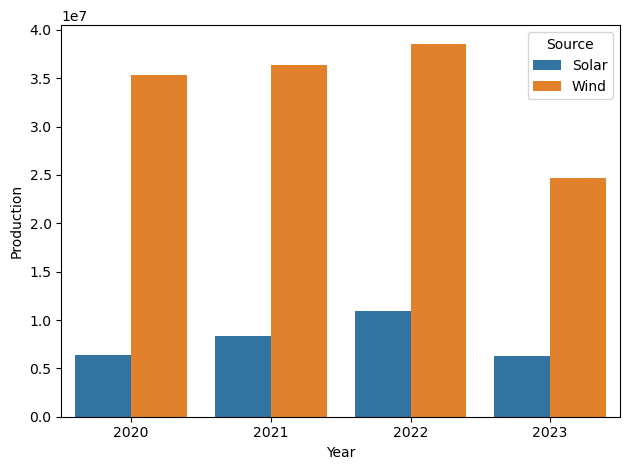

In [19]:
annual_production = df.groupby(by=['Source', 'Year'])['Production'].sum().reset_index()
sns.barplot(data=annual_production, x='Year', y='Production', hue='Source')
save_fig('Annual Energy Production')

# Which months have the highest average production for each source?

<Figure size 1400x800 with 0 Axes>

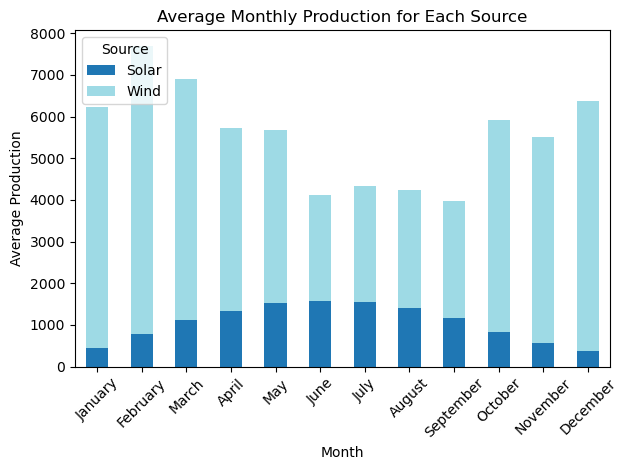

In [20]:
production_by_month_source = df.groupby(['monthName', 'Source'])['Production'].mean().unstack().reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

plt.figure(figsize=(14, 8))
production_by_month_source.plot(kind='bar', stacked=True, colormap='tab20')
plt.title('Average Monthly Production for Each Source')
plt.xlabel('Month')
plt.ylabel('Average Production')
plt.xticks(rotation=45)
plt.legend(title='Source', loc='upper left')
save_fig('Average Monthly Production for Each Source')
plt.show()

In [21]:
df = df.rename(columns={'Date and Hour' : 'DateTime'})
df['DateTime'] = df['DateTime'].str.slice(stop=-6)
df = df.sort_values(ascending=True,by='DateTime')
df = df.drop(['Date','dayOfYear','dayName','monthName'],axis=1)
df = df.dropna()

In [22]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [23]:
solar = df[df['Source'] == 'Solar']
wind = df[df['Source'] == 'Wind']

solar = solar[['DateTime','Production']]
df1 = solar.set_index('DateTime')

wind = wind[['DateTime','Production']]
df2 = wind.set_index('DateTime')

In [24]:
solar = solar[['DateTime','Production']]
df2 = solar.set_index('DateTime')

wind = wind[['DateTime','Production']]
df3= wind.set_index('DateTime')

# Solar  and Wind Power Generation Trend

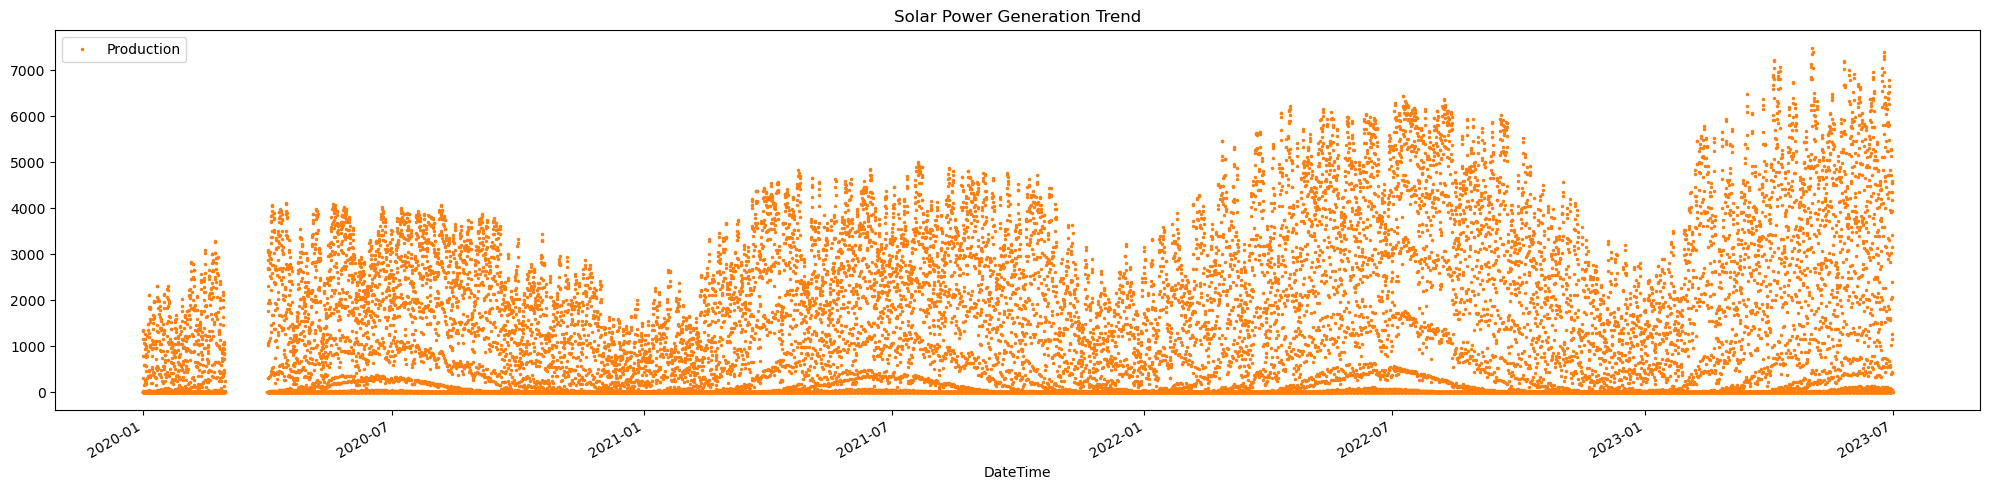

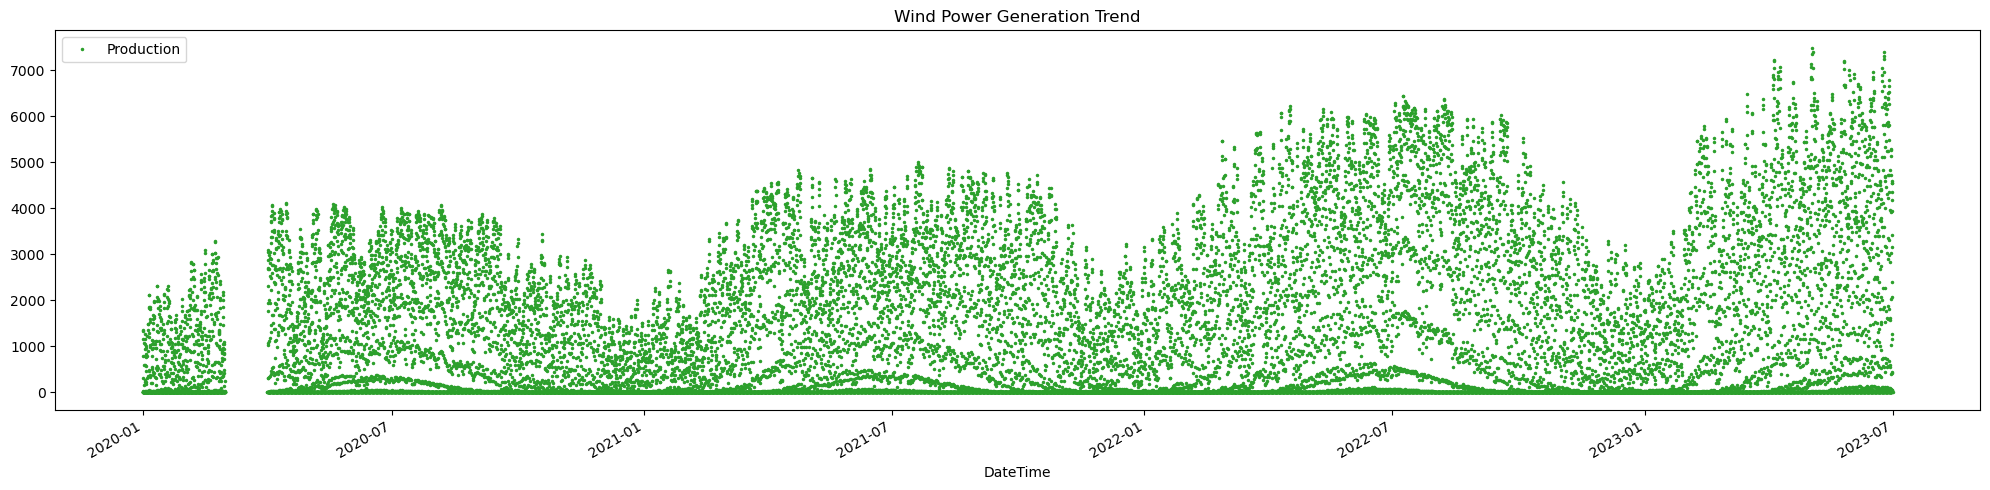

In [25]:
color_pal = sns.color_palette()
df1.plot(style='.',
          figsize=(20, 5),
          ms=3,
          color=color_pal[1],
          title='Solar Power Generation Trend')
save_fig('Solar Power Generation Trend')
plt.show()

df2.plot(style='.',
          figsize=(20, 5),
          ms=3,
          color=color_pal[2],
          title='Wind Power Generation Trend')
save_fig('Wind Power Generation Trend')
plt.show()

In [26]:
df1  = df1.reset_index().rename(columns={'DateTime':'ds','Production':'y'})

df1 = df1[(df1['ds'].dt.hour >= 6) & (df1['ds'].dt.hour < 18)]
df1.head()

,ds,y
6,2020-01-01 06:00:00,0.0
7,2020-01-01 07:00:00,0.0
8,2020-01-01 08:00:00,28.0
9,2020-01-01 09:00:00,310.0
10,2020-01-01 10:00:00,780.0


# Power Generated By Solar Power Plants in MW only in day Hours

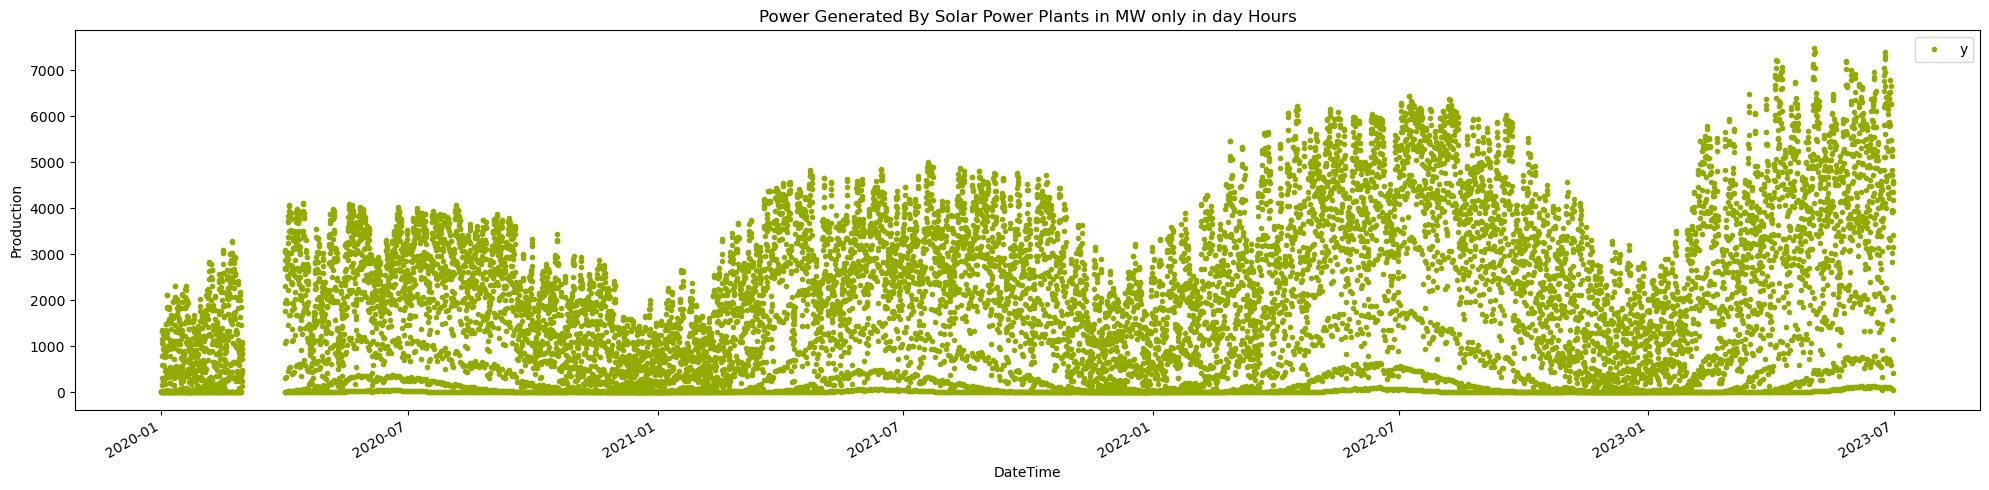

In [27]:
df5 = df1[["ds","y"]]
df5.set_index("ds", inplace = True)

# Color pallete for plotting
color_pal = ["#F8766D", "#D39200", "#93AA00","#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
df5.plot(style='.', figsize=(20,5), color=color_pal[2], title='Power Generated By Solar Power Plants in MW only in day Hours')
plt.xlabel('DateTime')
plt.ylabel('Production')
plt.ylim()
save_fig('Power Generated By Solar Power Plants in MW only in day Hours')
plt.show()

# Model Train

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [29]:
# Load the dataset
df = pd.read_csv('hybrid_power.csv')

In [30]:
df.head()

,Date and Hour,Date,StartHour,EndHour,Source,Production,dayOfYear,dayName,monthName
0,2020-07-22 20:00:00+02:00,2020-07-22,20:00:00,21:00:00,Solar,244.0,204,Wednesday,July
1,2020-07-23 07:00:00+02:00,2020-07-23,07:00:00,08:00:00,Solar,223.0,205,Thursday,July
2,2020-07-23 16:00:00+02:00,2020-07-23,16:00:00,17:00:00,Solar,2517.0,205,Thursday,July
3,2020-07-23 19:00:00+02:00,2020-07-23,19:00:00,20:00:00,Solar,658.0,205,Thursday,July
4,2020-07-23 23:00:00+02:00,2020-07-23,23:00:00,24:00:00,Solar,0.0,205,Thursday,July


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59806 entries, 0 to 59805
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date and Hour  59806 non-null  object 
 1   Date           59806 non-null  object 
 2   StartHour      59806 non-null  object 
 3   EndHour        59806 non-null  object 
 4   Source         59806 non-null  object 
 5   Production     59804 non-null  float64
 6   dayOfYear      59806 non-null  int64  
 7   dayName        59806 non-null  object 
 8   monthName      59806 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 4.1+ MB


In [32]:
# Count missing values in each column
missing_values = df.isnull().sum()
missing_values

Date and Hour    0
Date             0
StartHour        0
EndHour          0
Source           0
Production       2
dayOfYear        0
dayName          0
monthName        0
dtype: int64

In [33]:
# Handle missing values in the Production column by filling with the mean of the column
df['Production'].fillna(df['Production'].mean(), inplace=True)
df['Source'].value_counts() # its balanced

Source
Wind     29904
Solar    29902
Name: count, dtype: int64

In [34]:
# Count missing values in each column
missing_values = df.isnull().sum()
missing_values

Date and Hour    0
Date             0
StartHour        0
EndHour          0
Source           0
Production       0
dayOfYear        0
dayName          0
monthName        0
dtype: int64

## Encoding

In [35]:
encoder=LabelEncoder()
Source = encoder.fit_transform(df['Source'])
# Print the encodings
print("Labels:",encoder.classes_)
print("Encodings:",encoder.transform(encoder.classes_))

Labels: ['Solar' 'Wind']
Encodings: [0 1]


In [36]:
dayName = encoder.fit_transform(df['dayName'])

In [37]:
# Print the encodings
print("Labels:",encoder.classes_)
print("Encodings:",encoder.transform(encoder.classes_))

Labels: ['Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday' 'Tuesday' 'Wednesday']
Encodings: [0 1 2 3 4 5 6]


In [38]:
monthName = encoder.fit_transform(df['monthName'])
# Print the encodings
print("Labels:",encoder.classes_)
print("Encodings:",encoder.transform(encoder.classes_))

Labels: ['April' 'August' 'December' 'February' 'January' 'July' 'June' 'March'
 'May' 'November' 'October' 'September']
Encodings: [ 0  1  2  3  4  5  6  7  8  9 10 11]


In [39]:
# Replace encoded labels with main df
df['Source'] = Source
df['dayName'] = dayName
df['monthName'] = monthName

In [40]:
df.head()

,Date and Hour,Date,StartHour,EndHour,Source,Production,dayOfYear,dayName,monthName
0,2020-07-22 20:00:00+02:00,2020-07-22,20:00:00,21:00:00,0,244.0,204,6,5
1,2020-07-23 07:00:00+02:00,2020-07-23,07:00:00,08:00:00,0,223.0,205,4,5
2,2020-07-23 16:00:00+02:00,2020-07-23,16:00:00,17:00:00,0,2517.0,205,4,5
3,2020-07-23 19:00:00+02:00,2020-07-23,19:00:00,20:00:00,0,658.0,205,4,5
4,2020-07-23 23:00:00+02:00,2020-07-23,23:00:00,24:00:00,0,0.0,205,4,5


## Dataset Split

In [41]:
# Convert to Hours
df['StartHour'] = pd.to_timedelta(df['StartHour'])
df['StartHour'] = df['StartHour'].dt.total_seconds() / 3600

df['EndHour'] = pd.to_timedelta(df['EndHour'])
df['EndHour'] = df['EndHour'].dt.total_seconds() / 3600

In [42]:
y = df['Source']
x = df.drop(columns=['Source','Date and Hour','Date'])

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2,stratify=df['Source'])

In [44]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(47844, 6)
(47844,)
(11962, 6)
(11962,)


## Standardization

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()

In [47]:
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.fit_transform(x_test), columns=x_test.columns)

## Decision Tree Classifier

In [48]:
# Step-1: Import model
from sklearn.tree import DecisionTreeClassifier

# Step-2: Create an object of the model
dt = DecisionTreeClassifier(random_state=42)

# Step-3: Fit the model with the training set or train model
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [49]:
# Step-4: Get prediction from the model
y_pred_dt = dt.predict(x_test)

In [50]:
# Step-5: Model preformance measure
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      5981
           1       0.89      0.89      0.89      5981

    accuracy                           0.89     11962
   macro avg       0.89      0.89      0.89     11962
weighted avg       0.89      0.89      0.89     11962



In [51]:
# Train and Test Accuracy
from sklearn.metrics import accuracy_score
print('Test Accuracy ',accuracy_score(y_test,y_pred_dt))
print('Train Accuracy ',accuracy_score(y_train,dt.predict(x_train)))

Test Accuracy  0.8890653736833305
Train Accuracy  0.9999790987375637


In [52]:
!pip install --upgrade scikit-plot scipy==1.9.3
# Restart the kernel here to ensure the correct SciPy version is loaded

     ---------------------------------------- 0.0/58.5 kB ? eta -:--:--
     ------------- ------------------------ 20.5/58.5 kB 320.0 kB/s eta 0:00:01
     --------------------------------- ---- 51.2/58.5 kB 518.5 kB/s eta 0:00:01
     -------------------------------------- 58.5/58.5 kB 513.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/39.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/39.9 MB 1.3 MB/s eta 0:00:31
   ---------------------------------------- 0.2/39.9 MB 2.3 MB/s eta 0:00:18
   ---------------------------------------- 0.5/39.9 MB 3.8 MB/s eta 0:00:11
    --------------------------------------- 0.9/39.9 MB 4.6 MB/s eta 0:00:09
   - -------------------------------------- 1.3/39.9 MB 5.5 MB/s eta 0:00:08
   - -------------------------------------- 1.8/39.9 MB 6.5 MB/s eta 0:00:06
   -- ------------------------------------- 2.1/39.9 MB 6.6 MB/s eta 0:00:06
   -- ------------------------------------- 2.1/39.9 MB 6.6 MB/s eta 0:00:06
  

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.6 which is incompatible.


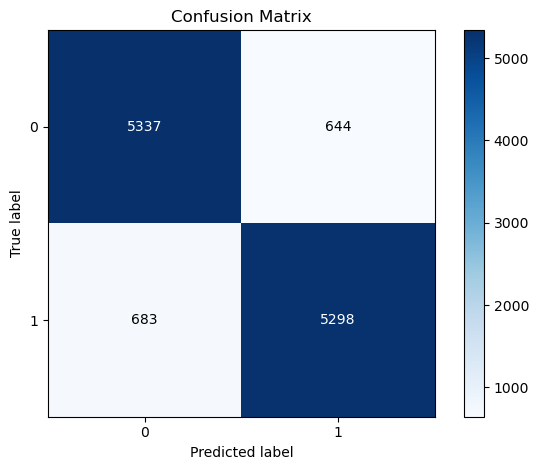

In [53]:
# See Confusion Matrix
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_confusion_matrix(y_test,y_pred_dt)
save_fig("DT")
plt.show()

## Random Forest

In [54]:
# Step-1: import the model from scikitlearn
from sklearn.ensemble import RandomForestClassifier

In [55]:
# Step-2: Create an instance or object of the model
rf = RandomForestClassifier(random_state=42)

In [56]:
# Step-3: Fit the training data or train the model
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [57]:
# Step-4: Get predictions from the model by test set
y_pred = rf.predict(x_test)

In [58]:
# Step-5: Performance measure
print('Test Accuracy:','{:.2f}'.format(accuracy_score(y_test,y_pred)))
print('Training Accuracy:','{:.2f}'.format(accuracy_score(y_train,rf.predict(x_train))))

Test Accuracy: 0.90
Training Accuracy: 1.00


In [59]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      5981
           1       0.93      0.86      0.89      5981

    accuracy                           0.90     11962
   macro avg       0.90      0.90      0.90     11962
weighted avg       0.90      0.90      0.90     11962



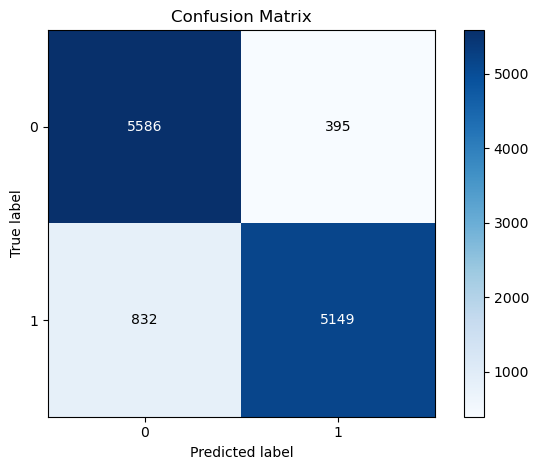

In [60]:
# Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test,y_pred)
save_fig("RF")

## Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
lr=LogisticRegression(random_state=42)

In [63]:
lr.fit(x_train,y_train)

LogisticRegression(random_state=42)

In [64]:
# Step-5: Performance measure
print('Test Accuracy:','{:.2f}'.format(accuracy_score(y_test,y_pred)))
print('Training Accuracy:','{:.2f}'.format(accuracy_score(y_train,lr.predict(x_train))))

Test Accuracy: 0.90
Training Accuracy: 0.74


In [65]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      5981
           1       0.93      0.86      0.89      5981

    accuracy                           0.90     11962
   macro avg       0.90      0.90      0.90     11962
weighted avg       0.90      0.90      0.90     11962



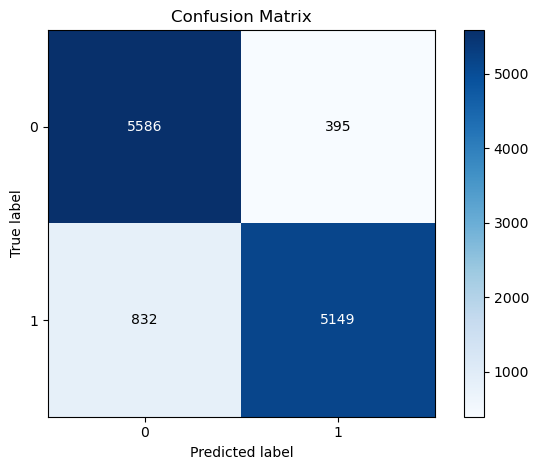

In [66]:
# Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test,y_pred)
save_fig("LR")

## GradientBoosting Classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
# Train and evaluate Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(x_train,y_train)
gb_y_pred = gb_model.predict(x_test)

In [68]:
# Performance measure
print('Test Accuracy:','{:.2f}'.format(accuracy_score(y_test,gb_y_pred )))
print('Training Accuracy:','{:.2f}'.format(accuracy_score(y_train,gb_model.predict(x_train))))

Test Accuracy: 0.88
Training Accuracy: 0.88


In [69]:
# Classification Report
print(classification_report(y_test,gb_y_pred ))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      5981
           1       0.92      0.82      0.87      5981

    accuracy                           0.88     11962
   macro avg       0.88      0.88      0.87     11962
weighted avg       0.88      0.88      0.87     11962



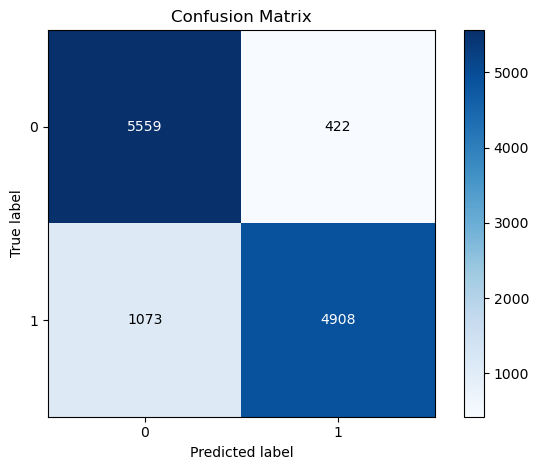

In [70]:
# Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test,gb_y_pred)
save_fig("GB")

## KNN

In [71]:
# Train and Evaluate KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(x_train,y_train)
knn_y_pred = knn_model.predict(x_test)

In [72]:
#  Performance measure
print('Test Accuracy:','{:.2f}'.format(accuracy_score(y_test,knn_y_pred)))
print('Training Accuracy:','{:.2f}'.format(accuracy_score(y_train,knn_model.predict(x_train))))

Test Accuracy: 0.88
Training Accuracy: 0.92


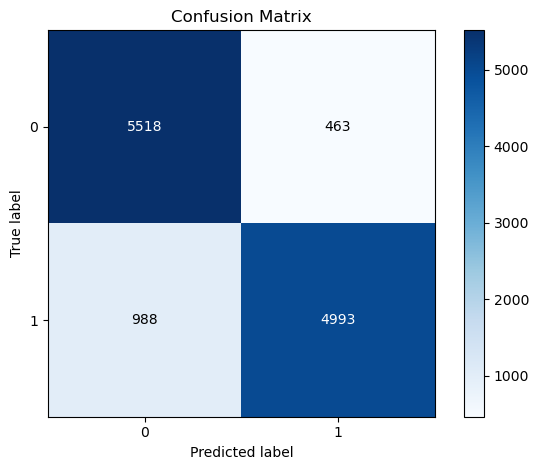

In [73]:
# Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test,knn_y_pred)
save_fig("KNN")

## AdaBoost Classifier

In [74]:
# Train and Evalueate AdaBoostClassifier
ab_model = AdaBoostClassifier(random_state=42)
ab_model.fit(x_train,y_train)
ab_y_pred = ab_model.predict(x_test)

In [75]:
# Step-5: Performance measure
print('Test Accuracy:','{:.2f}'.format(accuracy_score(y_test,ab_y_pred)))
print('Training Accuracy:','{:.2f}'.format(accuracy_score(y_train,ab_model.predict(x_train))))

Test Accuracy: 0.82
Training Accuracy: 0.82


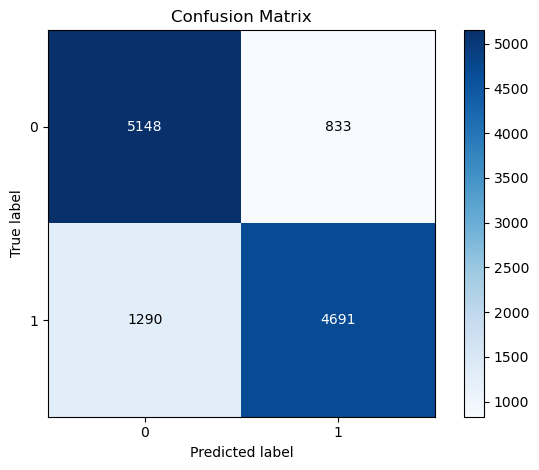

In [76]:
# Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test,ab_y_pred)
save_fig("Adaboost")

## Hyperparameter Tuning

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
# Function to perform grid search and get the best model
def grid_search(model, param_grid):
    grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(x_train, y_train)
    return grid_search.best_estimator_

# Decision Tree Classifier
dt_param_grid ={
    'max_depth': [3, 5, 7, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy']  # Function to measure the quality of a split
}
# Get the unique class labels present
present_labels = np.unique(y_train)

# Assuming 'labels' is your original target variable Series
# Replace this with the actual way you encoded your labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()  # Instantiate a new LabelEncoder
label_encoder.fit(labels) # Fit the encoder to your labels

# Filter the target names to include only those present in the predictions
present_target_names = [label_encoder.classes_[i] for i in present_labels]

dt_best_model = grid_search(DecisionTreeClassifier(random_state=42), dt_param_grid)
dt_y_pred = dt_best_model.predict(x_test)
dt_report = classification_report(y_test, dt_y_pred, target_names=present_target_names)
print("Decision Tree Classifier Report:\n", dt_report)

# Random Forest Classifier
rf_param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [5, 10, 15],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy']  # Function to measure the quality of a split
}
rf_best_model = grid_search(RandomForestClassifier(random_state=42), rf_param_grid)
rf_y_pred = rf_best_model.predict(x_test)
rf_report = classification_report(y_test, rf_y_pred, target_names=present_target_names)
print("Random Forest Classifier Report:\n", rf_report)

# Logistic Regression
lr_param_grid = {
    'C': [0.1, 1, 10],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Norm used in the penalization
    'solver': ['liblinear', 'saga']  # Algorithm to use in the optimization problem
}
lr_best_model = grid_search(LogisticRegression(random_state=42), lr_param_grid)
lr_y_pred = lr_best_model.predict(x_test)
lr_report = classification_report(y_test, lr_y_pred, target_names=present_target_names)
print("Logistic Regression Report:\n", lr_report)

# Gradient Boosting Classifier
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10, 15]
}
gb_best_model = grid_search(GradientBoostingClassifier(random_state=42), gb_param_grid)
gb_y_pred = gb_best_model.predict(x_test)
gb_report = classification_report(y_test, gb_y_pred, target_names=present_target_names)
print("Gradient Boosting Classifier Report:\n", gb_report)

# AdaBoost Classifier
ab_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}
ab_best_model = grid_search(AdaBoostClassifier(random_state=42), ab_param_grid)
ab_y_pred = ab_best_model.predict(x_test)
ab_report = classification_report(y_test, ab_y_pred, target_names=present_target_names)
print("AdaBoost Classifier Report:\n", ab_report)

# KNN Classifier
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 10],  # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used to compute the nearest neighbors
    'leaf_size': [20, 30, 40],  # Leaf size passed to BallTree or KDTree
    'p': [1, 2]  # Power parameter for the Minkowski metric
}
knn_best_model = grid_search(KNeighborsClassifier(), knn_param_grid)
knn_y_pred = knn_best_model.predict(x_test)
knn_report = classification_report(y_test, knn_y_pred, target_names=present_target_names)
print("KNN Classifier Report:\n", knn_report)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Decision Tree Classifier Report:
               precision    recall  f1-score   support

       Solar       0.83      0.97      0.89      5981
        Wind       0.96      0.80      0.87      5981

    accuracy                           0.88     11962
   macro avg       0.90      0.88      0.88     11962
weighted avg       0.90      0.88      0.88     11962

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Random Forest Classifier Report:
               precision    recall  f1-score   support

       Solar       0.86      0.97      0.91      5981
        Wind       0.97      0.84      0.90      5981

    accuracy                           0.91     11962
   macro avg       0.91      0.91      0.90     11962
weighted avg       0.91      0.91      0.90     11962

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Logistic Regression Report:
               precision    recall  f1-score   support

       S

# Model Train (After Feature Selection)

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
data = pd.read_csv('hybrid_power.csv')

# Handling missing values
imputer = SimpleImputer(strategy='mean')
data['Production'] = imputer.fit_transform(data[['Production']])

# Encoding categorical variables
label_encoder = LabelEncoder()
data['Source'] = label_encoder.fit_transform(data['Source'])
data['dayName'] = label_encoder.fit_transform(data['dayName'])
data['monthName'] = label_encoder.fit_transform(data['monthName'])

# Dropping irrelevant columns
data = data.drop(columns=['Date and Hour', 'Date', 'StartHour', 'EndHour'])

# Splitting the dataset into features and target variable
X = data.drop('Source', axis=1)
y = data['Source']

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Corvert numpy.ndarray to dataframe X_train, X_test, y_train, y_test
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
y_train = pd.DataFrame(y_train, columns=['Source'])
y_test = pd.DataFrame(y_test, columns=['Source'])

In [80]:
X_train.head()

,Production,dayOfYear,dayName,monthName
0,-0.286776,-0.290220,-0.999283,0.779235
1,-0.413102,-0.566577,-0.000401,-1.577423
2,0.110383,0.834267,-1.498723,1.662982
3,-0.304956,1.606161,1.497922,-0.988259
4,-0.796155,0.071903,-0.000401,0.190070


In [81]:
y_train.head()

,Source
56972,1
54528,0
29927,0
52841,1
7078,0


## DecisionTree Classifier

In [82]:
# Train and evaluate Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)

In [83]:
# Train and test accuracy
from sklearn.metrics import accuracy_score
print('Test Accuracy ',accuracy_score(y_test,dt_y_pred))
print('Train Accuracy ',accuracy_score(y_train,dt_model.predict(X_train)))

Test Accuracy  0.8072228724293596
Train Accuracy  0.99933115960204


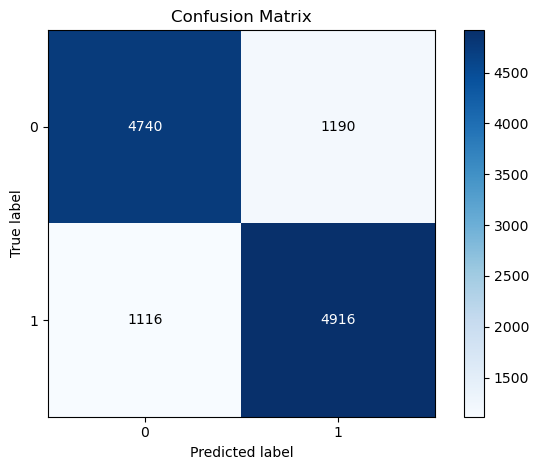

In [84]:
# plot the confusion matrix of decisiontree classifier
skplt.metrics.plot_confusion_matrix(y_test,dt_y_pred)
save_fig("DT-2")

## RandomForest Classifier

In [85]:
# Train and evaluate Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

In [86]:
# Train and test accuracy
print('Test Accuracy ',accuracy_score(y_test,rf_y_pred))
print('Train Accuracy ',accuracy_score(y_train,rf_model.predict(X_train)))

Test Accuracy  0.8435044306972078
Train Accuracy  0.99933115960204


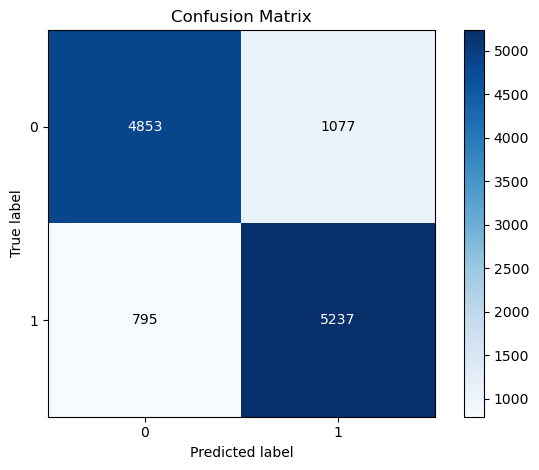

In [87]:
# plot the confusion matrix of RandomForestClassifier
skplt.metrics.plot_confusion_matrix(y_test,rf_y_pred)
save_fig("RF-2")

## LogisticRegression

In [88]:
# Train and evaluate Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)

In [89]:
# Train and test accuracy
print('Test Accuracy ',accuracy_score(y_test,lr_y_pred))
print('Train Accuracy ',accuracy_score(y_train,lr_model.predict(X_train)))

Test Accuracy  0.7264671459622136
Train Accuracy  0.7348674859961541


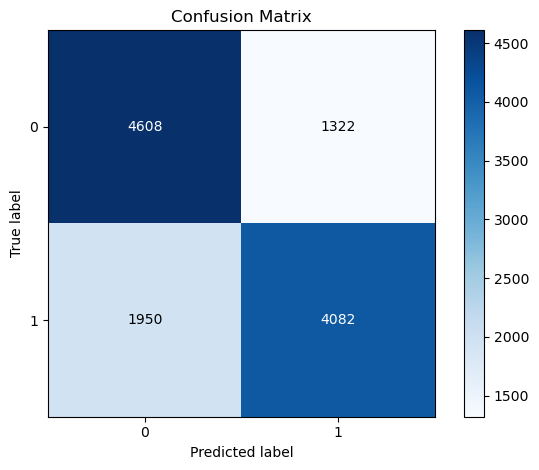

In [90]:
# plot the confusion matrix of LogisticRegression
skplt.metrics.plot_confusion_matrix(y_test,lr_y_pred)
save_fig("LR-2")

## GradientBoosting Classifier

In [91]:

# Train and evaluate Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)


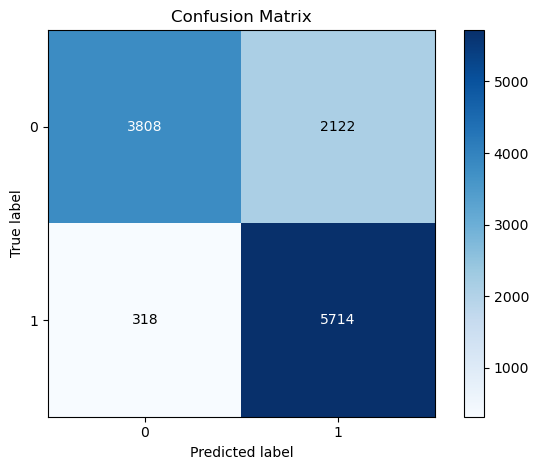

In [92]:
# plot the confusion matrix of Gradient Boosting Classifier
skplt.metrics.plot_confusion_matrix(y_test,gb_y_pred)
save_fig("GB-2")

In [93]:
# Train and Test accuracy
print('Test Accuracy ',accuracy_score(y_test,gb_y_pred))
print('Train Accuracy ',accuracy_score(y_train,gb_model.predict(X_train)))

Test Accuracy  0.7960207323190102
Train Accuracy  0.8031310091129504


## AdaBoostClassifier

In [94]:
# Train and evaluate AdaBoost Classifier
ab_model = AdaBoostClassifier(random_state=42)
ab_model.fit(X_train, y_train)
ab_y_pred = ab_model.predict(X_test)

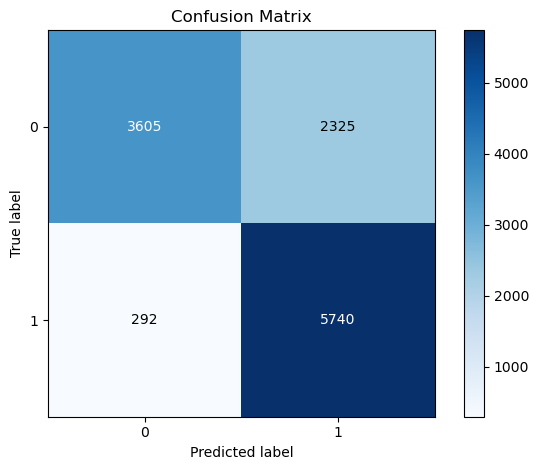

In [95]:
# # plot the confusion matrix of AdaBoost Classifier
skplt.metrics.plot_confusion_matrix(y_test,ab_y_pred)
save_fig("Adaboost-2")

In [96]:
# Train and Test accuracy
print('Test Accuracy ',accuracy_score(y_test,ab_y_pred))
print('Train Accuracy ',accuracy_score(y_train,ab_model.predict(X_train)))

Test Accuracy  0.781223875606086
Train Accuracy  0.7845079842822507


## KNN

In [97]:
#Apply Knn classifier
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)

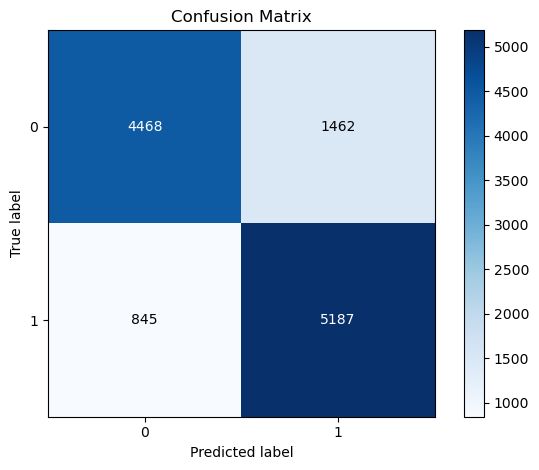

In [98]:
# # plot the confusion matrix of KNN Classifier
skplt.metrics.plot_confusion_matrix(y_test,knn_y_pred)
save_fig("KNN-2")

In [99]:
# Print train and test accuracy
print('Test Accuracy ',accuracy_score(y_test,knn_y_pred))
print('Train Accuracy ',accuracy_score(y_train,knn_model.predict(X_train)))

Test Accuracy  0.8071392743688346
Train Accuracy  0.8706211855196054


## Hyperparameter Tuning

In [100]:
from sklearn.model_selection import GridSearchCV

In [101]:
# Function to perform grid search and get the best model
def grid_search(model, param_grid):
    grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

# Decision Tree Classifier
dt_param_grid ={
    'max_depth': [3, 5, 7, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy']  # Function to measure the quality of a split
}

dt_best_model = grid_search(DecisionTreeClassifier(random_state=42), dt_param_grid)
dt_y_pred = dt_best_model.predict(X_test)
dt_report = classification_report(y_test, dt_y_pred)
print("Decision Tree Classifier Report:\n", dt_report)

# Random Forest Classifier
rf_param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [5, 10, 15],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy']  # Function to measure the quality of a split
}
rf_best_model = grid_search(RandomForestClassifier(random_state=42), rf_param_grid)
rf_y_pred = rf_best_model.predict(X_test)
rf_report = classification_report(y_test, rf_y_pred)
print("Random Forest Classifier Report:\n", rf_report)

# Logistic Regression
lr_param_grid = {
    'C': [0.1, 1, 10],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Norm used in the penalization
    'solver': ['liblinear', 'saga']  # Algorithm to use in the optimization problem
}
lr_best_model = grid_search(LogisticRegression(random_state=42), lr_param_grid)
lr_y_pred = lr_best_model.predict(X_test)
lr_report = classification_report(y_test, lr_y_pred)
print("Logistic Regression Report:\n", lr_report)

# Gradient Boosting Classifier
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10, 15]
}
gb_best_model = grid_search(GradientBoostingClassifier(random_state=42), gb_param_grid)
gb_y_pred = gb_best_model.predict(X_test)
gb_report = classification_report(y_test, gb_y_pred)
print("Gradient Boosting Classifier Report:\n", gb_report)

# AdaBoost Classifier
ab_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}
ab_best_model = grid_search(AdaBoostClassifier(random_state=42), ab_param_grid)
ab_y_pred = ab_best_model.predict(X_test)
ab_report = classification_report(y_test, ab_y_pred)
print("AdaBoost Classifier Report:\n", ab_report)

# KNN Classifier
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 10],  # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used to compute the nearest neighbors
    'leaf_size': [20, 30, 40],  # Leaf size passed to BallTree or KDTree
    'p': [1, 2]  # Power parameter for the Minkowski metric
}
knn_best_model = grid_search(KNeighborsClassifier(), knn_param_grid)
knn_y_pred = knn_best_model.predict(X_test)
knn_report = classification_report(y_test, knn_y_pred)
print("KNN Classifier Report:\n", knn_report)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Decision Tree Classifier Report:
               precision    recall  f1-score   support

           0       0.90      0.68      0.77      5930
           1       0.74      0.93      0.83      6032

    accuracy                           0.80     11962
   macro avg       0.82      0.80      0.80     11962
weighted avg       0.82      0.80      0.80     11962

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Random Forest Classifier Report:
               precision    recall  f1-score   support

           0       0.94      0.73      0.82      5930
           1       0.78      0.95      0.86      6032

    accuracy                           0.84     11962
   macro avg       0.86      0.84      0.84     11962
weighted avg       0.86      0.84      0.84     11962

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Logistic Regression Report:
               precision    recall  f1-score   support

        